In [1]:
# import general libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dataset Description

- Dataset obtained from https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial/data 😁

- Features: 
    - Price: `vhigh, high, med, low`
    - Maintenance Cost: `vhigh, high, med, low`
    - Number of Doors: `5more, 4, 3, 2`
    - Person Capacity: `2, 4, more`
    - Luggage Boot Size: `small, med, big`
    - Safety: `low, med, high` (estimated safety)

- Target:
    - Acceptability: `unacc, acc, good, vgood`

In [2]:
# import dataset
dataset = pd.read_csv('car_evaluation.csv')

In [3]:
dataset

,Price,Maintenance Cost,Number of Doors,Person Capacity,Luggage Boot Size,Safety,Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
# rename the columns
features = ['Price', 'Maintenance', 'Doors', 'Persons', 'Luggage', 'Safety']
dataset.columns = features + ['Acceptability']

dataset

,Price,Maintenance,Doors,Persons,Luggage,Safety,Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


# Exploratory Data Analysis

In [5]:
# check if there are null values
dataset.isna().any()

Price            False
Maintenance      False
Doors            False
Persons          False
Luggage          False
Safety           False
Acceptability    False
dtype: bool

In [6]:
# view shape of dataset
dataset.shape

(1728, 7)

In [7]:
# see the distribute of each category in each feature
for feature in features:
    print(dataset[feature].value_counts())
    print('-------')

vhigh    432
high     432
med      432
low      432
Name: Price, dtype: int64
-------
vhigh    432
high     432
med      432
low      432
Name: Maintenance, dtype: int64
-------
2        432
3        432
4        432
5more    432
Name: Doors, dtype: int64
-------
2       576
4       576
more    576
Name: Persons, dtype: int64
-------
small    576
med      576
big      576
Name: Luggage, dtype: int64
-------
low     576
med     576
high    576
Name: Safety, dtype: int64
-------


In [8]:
# see the distribute of each category in the output variable
dataset['Acceptability'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: Acceptability, dtype: int64

In [9]:
# Information of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Price          1728 non-null   object
 1   Maintenance    1728 non-null   object
 2   Doors          1728 non-null   object
 3   Persons        1728 non-null   object
 4   Luggage        1728 non-null   object
 5   Safety         1728 non-null   object
 6   Acceptability  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


# Get Matrix of Features & Dependent Variable Vector

In [10]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [11]:
print(x)

[['vhigh' 'vhigh' '2' '2' 'small' 'low']
 ['vhigh' 'vhigh' '2' '2' 'small' 'med']
 ['vhigh' 'vhigh' '2' '2' 'small' 'high']
 ...
 ['low' 'low' '5more' 'more' 'big' 'low']
 ['low' 'low' '5more' 'more' 'big' 'med']
 ['low' 'low' '5more' 'more' 'big' 'high']]


In [12]:
print(y)

['unacc' 'unacc' 'unacc' ... 'unacc' 'good' 'vgood']


# Splitting dataset into Training set & Test set

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Visualize Training & Test sets in brief

In [14]:
print(type(x_train))
print(x_train.shape)
print(x_train)

<class 'numpy.ndarray'>
(1382, 6)
[['low' 'low' '3' '2' 'small' 'high']
 ['low' 'high' '4' '2' 'big' 'med']
 ['vhigh' 'low' '3' '4' 'small' 'med']
 ...
 ['low' 'low' '3' '2' 'big' 'low']
 ['high' 'high' '2' 'more' 'small' 'med']
 ['high' 'med' '3' '4' 'small' 'low']]


In [15]:
print(type(y_train))
print(y_train.shape)
print(y_train)

<class 'numpy.ndarray'>
(1382,)
['unacc' 'unacc' 'unacc' ... 'unacc' 'unacc' 'unacc']


In [16]:
print(type(x_test))
print(x_test.shape)
print(x_test)

<class 'numpy.ndarray'>
(346, 6)
[['low' 'vhigh' '2' 'more' 'med' 'med']
 ['vhigh' 'high' '2' '4' 'big' 'med']
 ['high' 'med' '2' '2' 'small' 'low']
 ...
 ['vhigh' 'med' '5more' 'more' 'small' 'high']
 ['vhigh' 'high' '3' '2' 'big' 'med']
 ['vhigh' 'low' '5more' 'more' 'med' 'med']]


In [17]:
print(type(y_test))
print(y_test.shape)
print(y_test)

<class 'numpy.ndarray'>
(346,)
['unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'good' 'unacc' 'acc' 'acc'
 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'acc'
 'unacc' 'good' 'acc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc'
 'unacc' 'unacc' 'good' 'acc' 'unacc' 'acc' 'good' 'unacc' 'unacc' 'unacc'
 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'vgood' 'unacc' 'unacc'
 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc'
 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc'
 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'acc' 'acc' 'acc'
 'unacc' 'acc' 'acc' 'unacc' 'acc' 'acc' 'acc' 'unacc' 'unacc' 'unacc'
 'unacc' 'good' 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc'
 'vgood' 'unacc' 'acc' 'acc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'vgood'
 'acc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc'
 'good' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'vgood' 'unacc'
 'unacc' 'unacc' 'unacc' 'acc' '

# Encoding Categorical Variables

- All features, and target are categorical variables (in our dataset, see dataset description section).

- However, we dont need to encode the target categorical variable.

- We need to encode the dependent categorical variables.

- Lets make use of `OrdinalEncoder` of scikit-learn to do this: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

In [18]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

x_train = enc.fit_transform(x_train)

x_test = enc.transform(x_test)

In [19]:
print(type(x_train))
print(x_train.shape)
print(x_train)

<class 'numpy.ndarray'>
(1382, 6)
[[1. 1. 1. 0. 2. 0.]
 [1. 0. 2. 0. 0. 2.]
 [3. 1. 1. 1. 2. 2.]
 ...
 [1. 1. 1. 0. 0. 1.]
 [0. 0. 0. 2. 2. 2.]
 [0. 2. 1. 1. 2. 1.]]


In [20]:
print(type(x_test))
print(x_test.shape)
print(x_test)

<class 'numpy.ndarray'>
(346, 6)
[[1. 3. 0. 2. 1. 2.]
 [3. 0. 0. 1. 0. 2.]
 [0. 2. 0. 0. 2. 1.]
 ...
 [3. 2. 3. 2. 2. 0.]
 [3. 0. 1. 0. 0. 2.]
 [3. 1. 3. 2. 1. 2.]]


# Training the Decision Tree model on the Training Set

- Make use of `DecisionTreeClassifier` class which `sklearn.tree` module provides: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

- **NOTE:** Default Split Criterion is *Gini Index*.

In [21]:
# creating a model with Gini Index criterion (default)
from sklearn.tree import DecisionTreeClassifier

model_gini = DecisionTreeClassifier()

# train the model
classifier_gini = model_gini.fit(x_train, y_train)
# save the model, to use it for plotting the decision tree

In [22]:
# creating a model with Entropy criterion
from sklearn.tree import DecisionTreeClassifier

model_entropy = DecisionTreeClassifier(criterion = 'entropy')

# train the model
classifier_entropy = model_entropy.fit(x_train, y_train)
# save the model, to use it for plotting the decision tree

# Predicting Test Set results

In [23]:
y_pred_gini = model_gini.predict(x_test)
y_pred_entropy = model_entropy.predict(x_test)

In [33]:
# visualise y_test and y_pred_gini
df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_entropy
})

df

,Actual,Predicted
0,unacc,unacc
1,unacc,unacc
2,unacc,unacc
3,unacc,unacc
4,unacc,unacc
...,...,...
341,vgood,vgood
342,unacc,unacc
343,acc,acc
344,unacc,unacc


In [35]:
# number of misclassified examples
(df['Actual'] != df['Predicted']).sum()

7

# Classification Report & Accuracy Score

In [24]:
# view the accuracy score
from sklearn.metrics import accuracy_score

print('Using Gini Index, Accuracy:', accuracy_score(y_test, y_pred_gini))
print('Using Entropy, Accuracy:', accuracy_score(y_test, y_pred_entropy))

Using Gini Index, Accuracy: 0.9682080924855492
Using Entropy, Accuracy: 0.9797687861271677


In [25]:
# viewing the classification report for the model with Gini Index criterion
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

         acc       0.95      0.91      0.93        79
        good       0.84      0.94      0.89        17
       unacc       0.98      0.99      0.99       240
       vgood       1.00      0.90      0.95        10

    accuracy                           0.97       346
   macro avg       0.94      0.94      0.94       346
weighted avg       0.97      0.97      0.97       346



In [26]:
# viewing the classification report for the model with Entropy criterion
print(classification_report(y_test, y_pred_entropy))

              precision    recall  f1-score   support

         acc       0.99      0.92      0.95        79
        good       0.77      1.00      0.87        17
       unacc       1.00      1.00      1.00       240
       vgood       1.00      0.90      0.95        10

    accuracy                           0.98       346
   macro avg       0.94      0.96      0.94       346
weighted avg       0.98      0.98      0.98       346



# Plotting the Decision Tree

- We will get a very big decision tree! 🤩

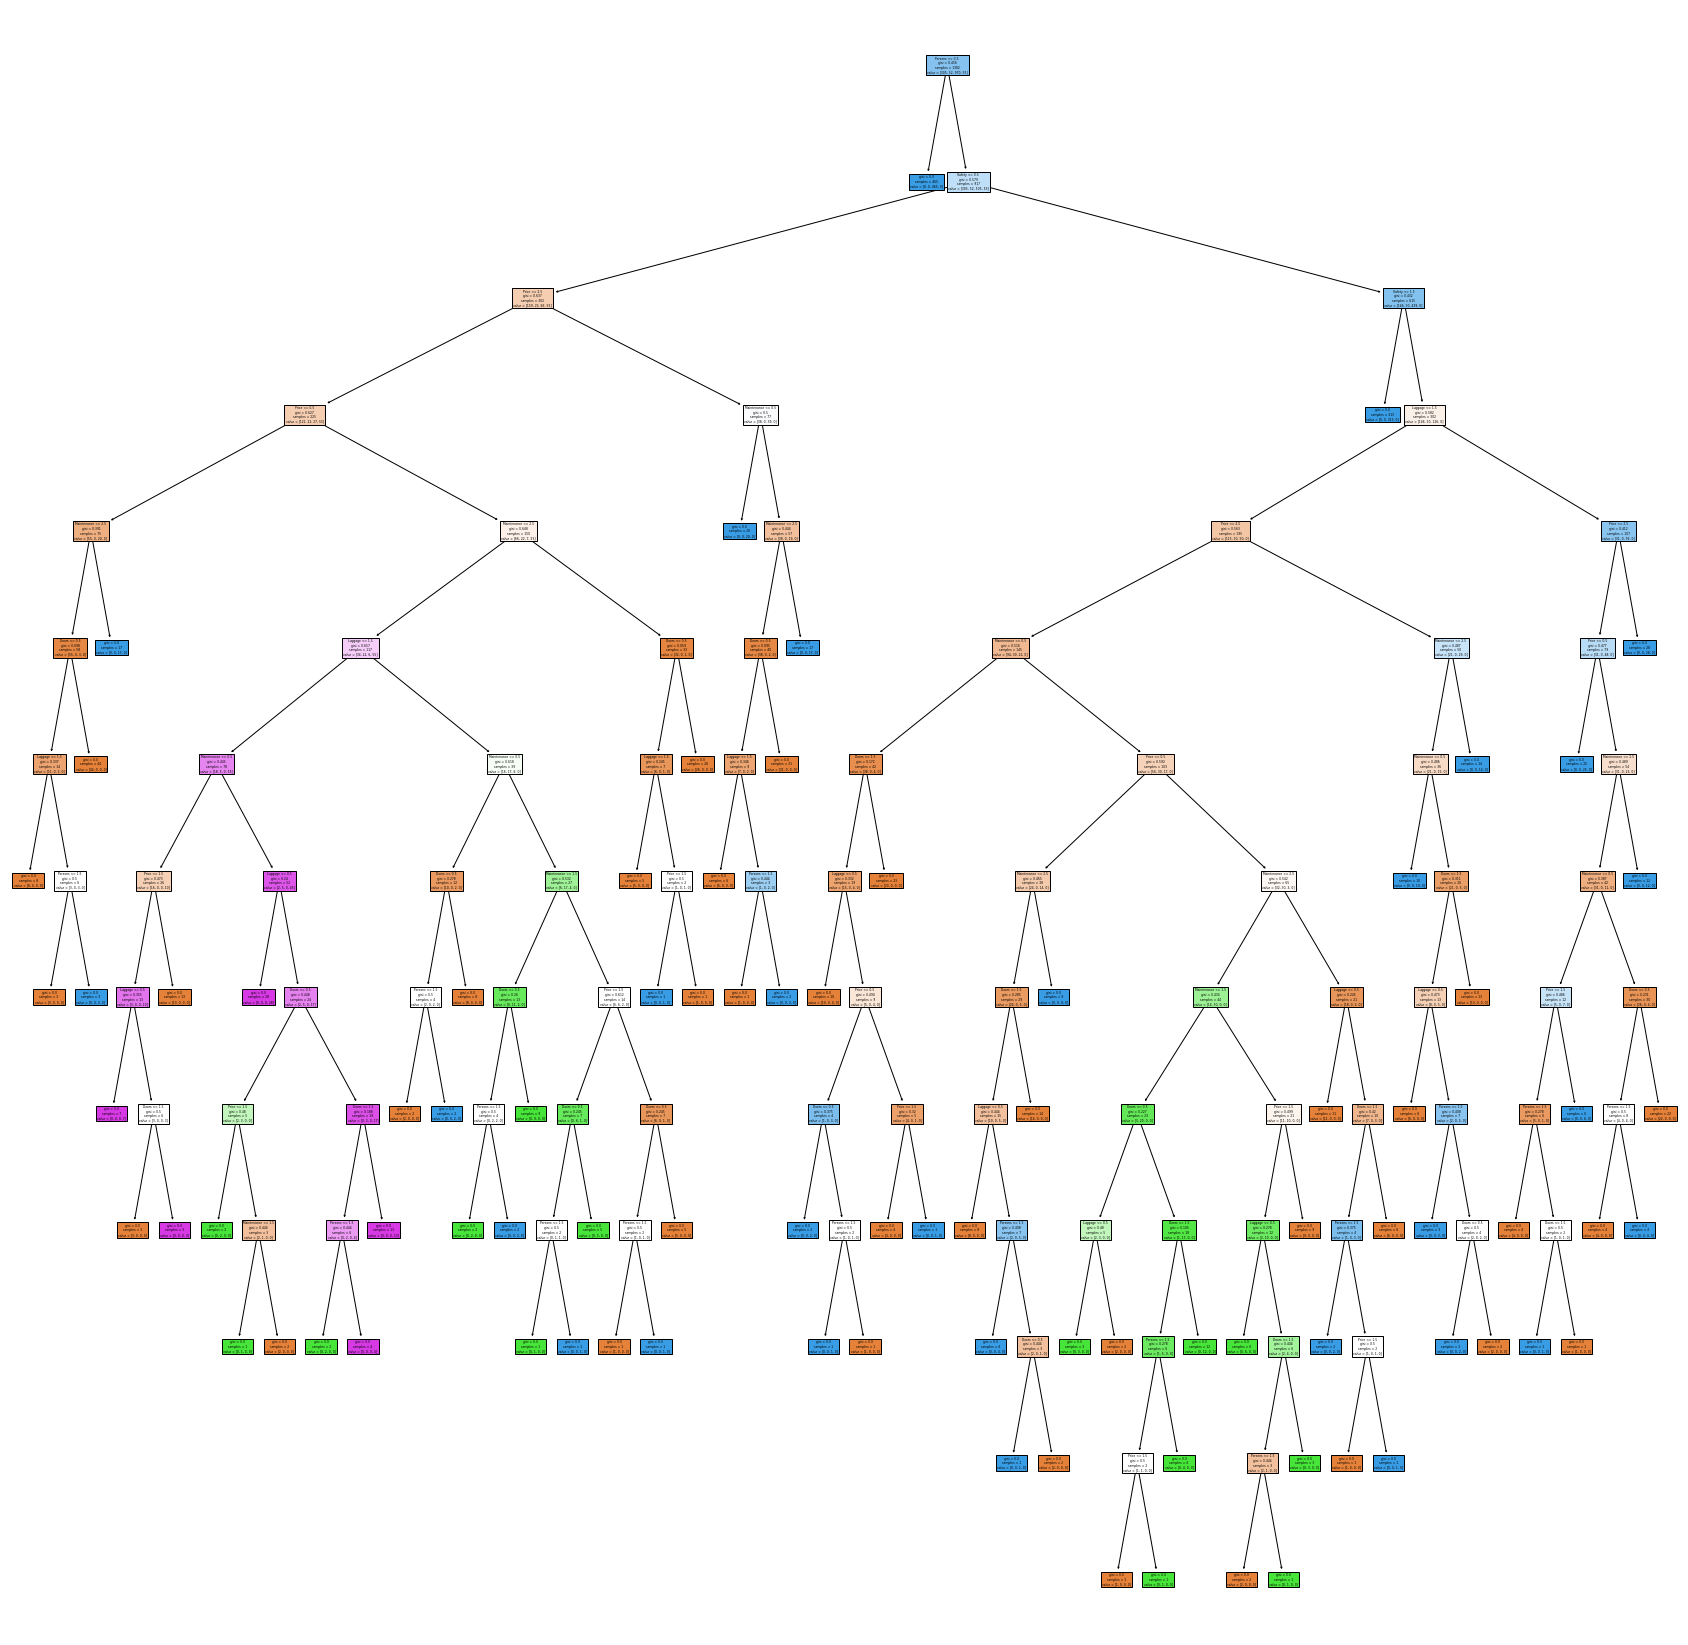

In [27]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize = (30, 30))
_ = plot_tree(classifier_gini, feature_names = features, filled = True)

# Decision Tree with a reduced depth

- We observe that the depth is very big, if we reduce the depth, the accuracy might decrease. Lets do this for a decision tree with entropy criterion.

In [28]:
# creating a model with Entropy criterion
from sklearn.tree import DecisionTreeClassifier

model_entropy_2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

# train the model
classifier_entropy_2 = model_entropy_2.fit(x_train, y_train)
# save the model, to use it for plotting the decision tree

In [29]:
# predict test set results
y_pred_entropy_2 = model_entropy_2.predict(x_test)

In [36]:
# see the classification result
df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_entropy_2
})

df

,Actual,Predicted
0,unacc,acc
1,unacc,acc
2,unacc,unacc
3,unacc,unacc
4,unacc,unacc
...,...,...
341,vgood,acc
342,unacc,unacc
343,acc,unacc
344,unacc,unacc


In [37]:
# see the number of misclassified examples
(df['Actual'] != df['Predicted']).sum()

82

In [30]:
# classification report and accuracy score
print(accuracy_score(y_test, y_pred_entropy_2))
print(classification_report(y_test, y_pred_entropy_2))

0.7630057803468208
              precision    recall  f1-score   support

         acc       0.49      0.90      0.63        79
        good       0.00      0.00      0.00        17
       unacc       0.96      0.80      0.88       240
       vgood       0.00      0.00      0.00        10

    accuracy                           0.76       346
   macro avg       0.36      0.43      0.38       346
weighted avg       0.78      0.76      0.75       346



C:\Users\Yogendra\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yogendra\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yogendra\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


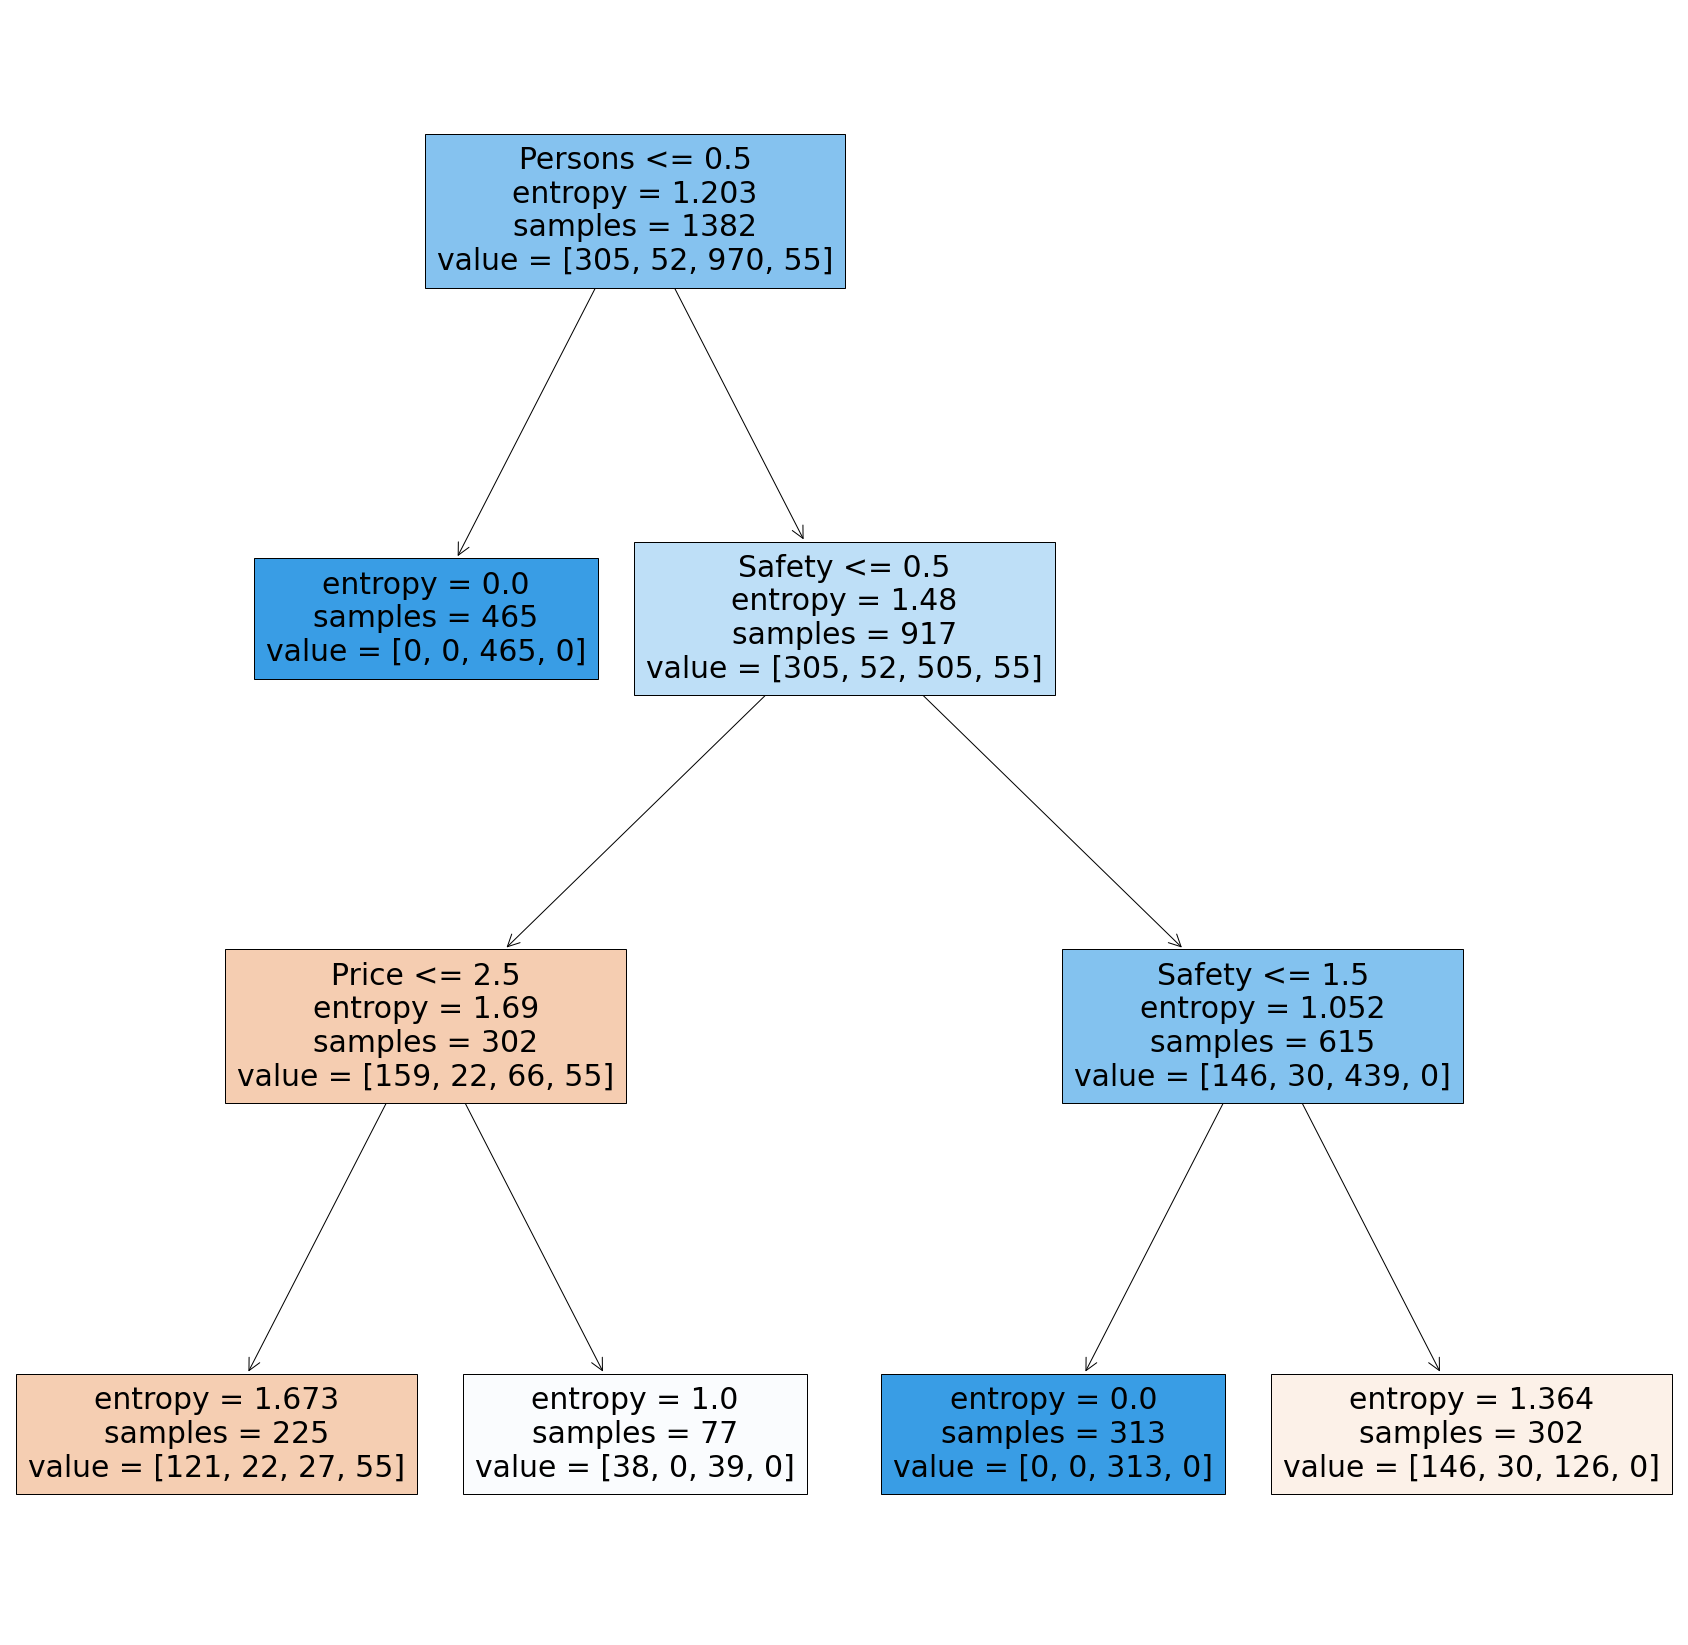

In [31]:
fig = plt.figure(figsize = (30, 30))
_ = plot_tree(classifier_entropy_2, feature_names = features, filled = True)